# ATP Tennis Data - Player Diff Stats


In our previous [notebook](https://github.com/sv650s/sb-capstone2/blob/master/notebooks/4-atp_logistic_regression.ipynb), we ran logistic regression on a number of data set. Our results came from dataset where we one hot encoded all categorical columns

In this notebook, we will run a number of models using the player diff dataaset starting from 1985 through a number of models


### Results from Diff Data Set starting from 1985:

```
              precision    recall  f1-score   support

        Loss       0.69      0.66      0.68     12502
         Win       0.67      0.71      0.69     12487

    accuracy                           0.68     24989
   macro avg       0.68      0.68      0.68     24989
weighted avg       0.68      0.68      0.68     24989
```

# Summary of Results

Our best results came from Decision Tree Classifier achieving 92% accuracy while KNN did the worst at about 62% (below our null hypothesis

```
Model Score: 0.924307900067522

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.92      7416
         Win       0.93      0.92      0.92      7394

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810
```


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff"


# update this
FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-{DESCRIPTION}.csv'

START_YEAR = 1998
END_YEAR = 2018

LABEL_COL = 'p1_winner'

# random seed
RSTATE = 1
N_JOBS = 4
MAX_ITER = 100



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6948683322079676

              precision    recall  f1-score   support

        Loss       0.71      0.66      0.68      7453
         Win       0.68      0.73      0.70      7357

    accuracy                           0.69     14810
   macro avg       0.70      0.70      0.69     14810
weighted avg       0.70      0.69      0.69     14810

      Loss   Win
Loss  4909  2544
Win   1975  5382


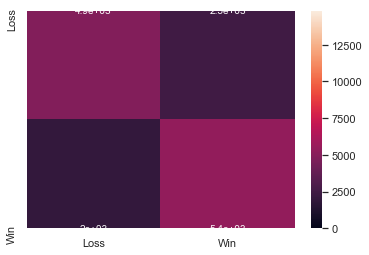

In [4]:
lr.analyze()

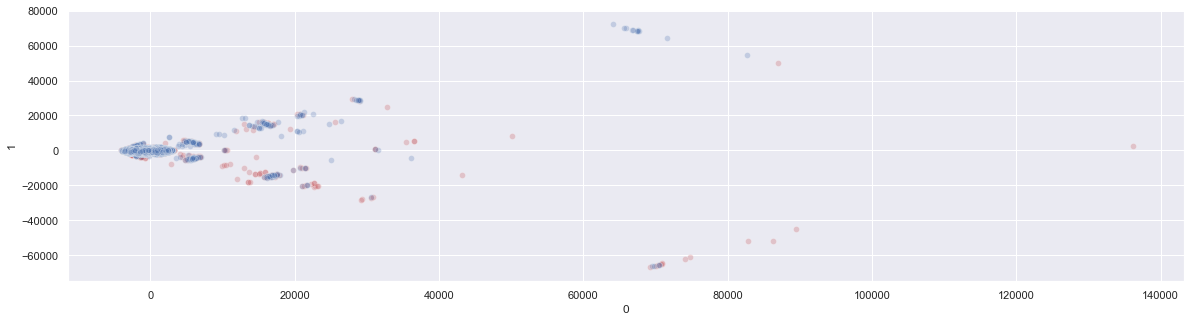

In [5]:
ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.612559081701553

              precision    recall  f1-score   support

        Loss       0.61      0.62      0.62      7453
         Win       0.61      0.61      0.61      7357

    accuracy                           0.61     14810
   macro avg       0.61      0.61      0.61     14810
weighted avg       0.61      0.61      0.61     14810

      Loss   Win
Loss  4596  2857
Win   2881  4476


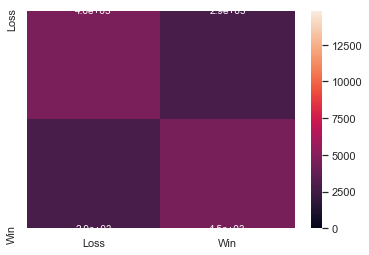

In [8]:
knn.analyze()

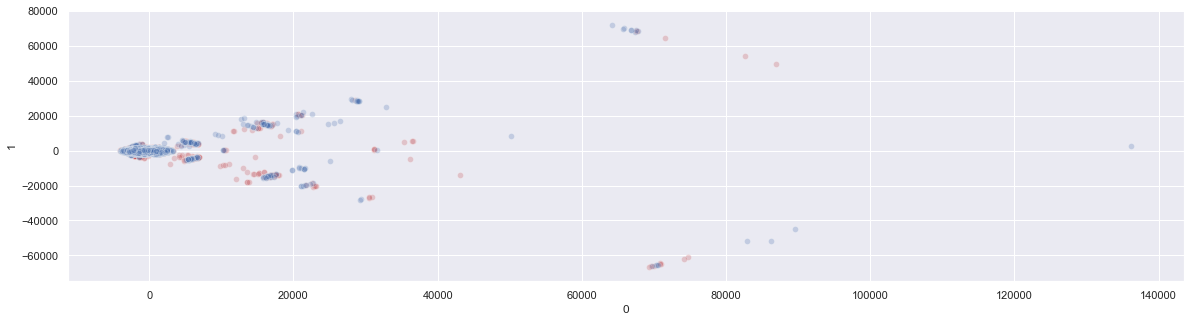

In [9]:
ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.9228899392302499

              precision    recall  f1-score   support

        Loss       0.92      0.93      0.92      7453
         Win       0.92      0.92      0.92      7357

    accuracy                           0.92     14810
   macro avg       0.92      0.92      0.92     14810
weighted avg       0.92      0.92      0.92     14810

      Loss   Win
Loss  6896   557
Win    585  6772


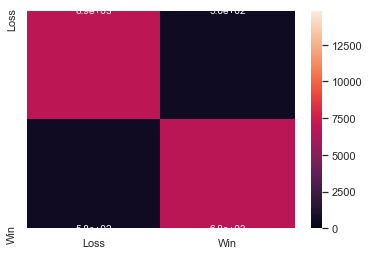

In [12]:
dt.analyze()

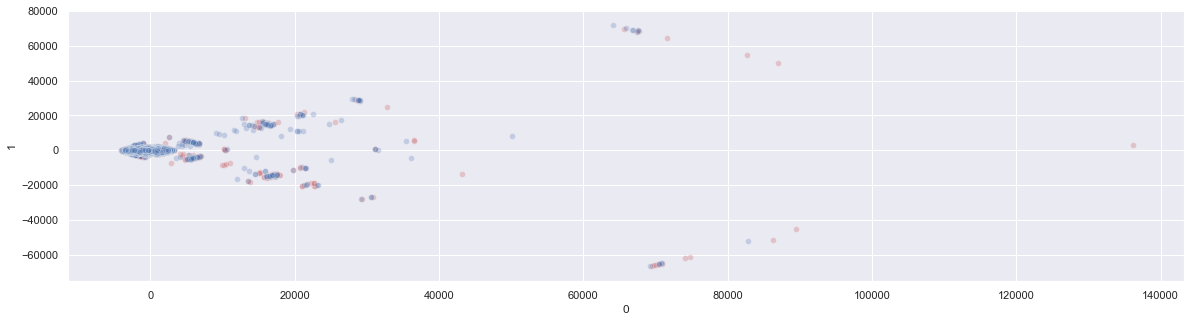

In [13]:
ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

//anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.8586090479405807

              precision    recall  f1-score   support

        Loss       0.84      0.89      0.86      7453
         Win       0.89      0.82      0.85      7357

    accuracy                           0.86     14810
   macro avg       0.86      0.86      0.86     14810
weighted avg       0.86      0.86      0.86     14810

      Loss   Win
Loss  6667   786
Win   1308  6049


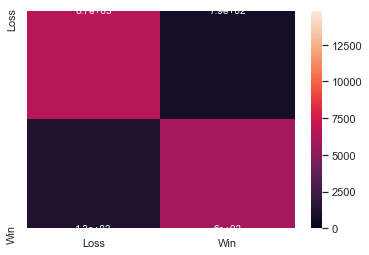

In [16]:
rf.analyze()

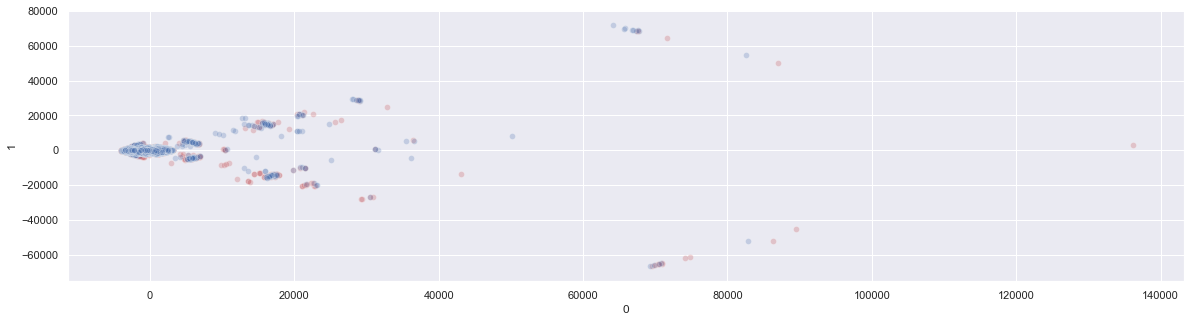

In [17]:
ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3157            2.89s
         2           1.2579            2.85s
         3           1.2102            2.79s
         4           1.1722            2.77s
         5           1.1405            2.83s
         6           1.1058            2.83s
         7           1.0785            2.80s
         8           1.0558            2.79s
         9           1.0321            2.74s
        10           1.0159            2.70s
        20           0.8899            2.33s
        30           0.8228            1.94s
        40           0.7863            1.62s
        50           0.7563            1.33s
        60           0.7229            1.06s
        70           0.7031            0.79s
        80           0.6777            0.53s
        90           0.6558            0.26s
       100           0.6426            0.00s


Model Score: 0.8686022957461175

              precision    recall  f1-score   support

        Loss       0.85      0.89      0.87      7453
         Win       0.88      0.85      0.86      7357

    accuracy                           0.87     14810
   macro avg       0.87      0.87      0.87     14810
weighted avg       0.87      0.87      0.87     14810

      Loss   Win
Loss  6634   819
Win   1127  6230


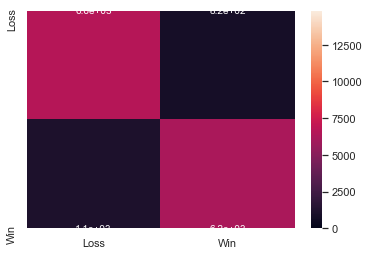

In [20]:
gb.analyze()

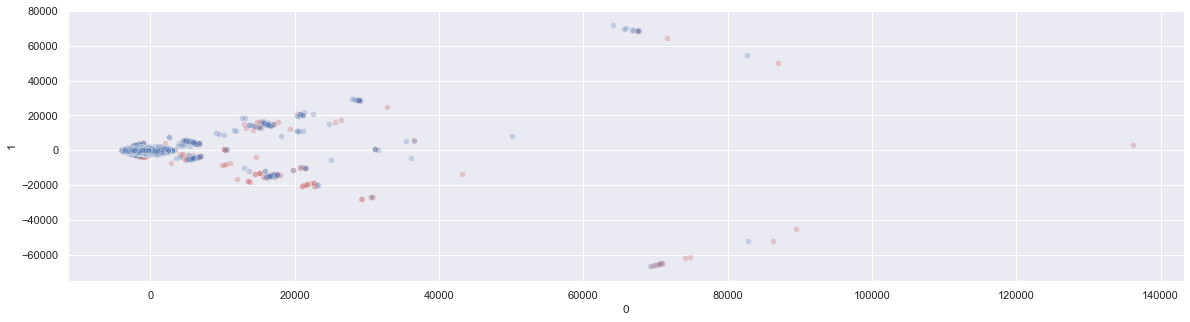

In [21]:
ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.7555705604321404

              precision    recall  f1-score   support

        Loss       0.74      0.79      0.77      7453
         Win       0.77      0.72      0.75      7357

    accuracy                           0.76     14810
   macro avg       0.76      0.76      0.76     14810
weighted avg       0.76      0.76      0.76     14810

      Loss   Win
Loss  5893  1560
Win   2060  5297


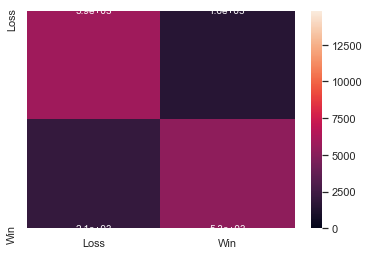

In [24]:
ab.analyze()

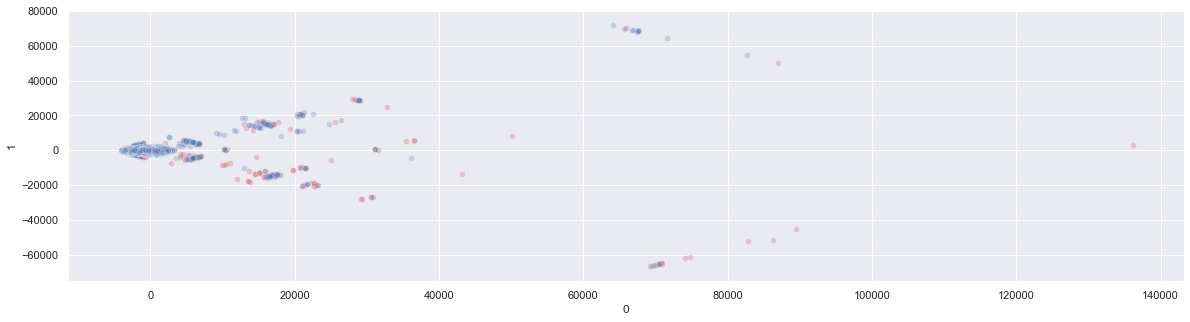

In [25]:
ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

# Summary

Decision Tree Classifier did the best with a 92% accuracy score while KNN did the worst at about 60% (below our null hypothesis)

In [4]:
report = pd.read_csv(ab.report_file)
report = report[report.description == DESCRIPTION]
report

,model_name,description,data_file,start_year,accuracy,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min
0,LogisticRegression,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.694868,"{""0"": {""0"": 4909, ""1"": 1975}, ""1"": {""0"": 2544,...","{""Loss"": {""precision"": 0.713102847181871, ""rec...",../models/logisticregression-1998-2018-diff.pkl,0.0,0.0
1,KNeighborsClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.612559,"{""0"": {""0"": 4596, ""1"": 2881}, ""1"": {""0"": 2857,...","{""Loss"": {""precision"": 0.6146850341045874, ""re...",../models/kneighborsclassifier-1998-2018-diff.pkl,0.0,0.0
2,DecisionTreeClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.922890,"{""0"": {""0"": 6896, ""1"": 585}, ""1"": {""0"": 557, ""...","{""Loss"": {""precision"": 0.9218018981419597, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0
3,RandomForestClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.858609,"{""0"": {""0"": 6667, ""1"": 1308}, ""1"": {""0"": 786, ...","{""Loss"": {""precision"": 0.835987460815047, ""rec...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0
4,GradientBoostingClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.868602,"{""0"": {""0"": 6634, ""1"": 1127}, ""1"": {""0"": 819, ...","{""Loss"": {""precision"": 0.8547867542842417, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0
5,AdaBoostClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,0.755571,"{""0"": {""0"": 5893, ""1"": 2060}, ""1"": {""0"": 1560,...","{""Loss"": {""precision"": 0.7409782472023136, ""re...",../models/adaboostclassifier-1998-2018-diff.pkl,0.0,0.0


Text(0.5, 1.0, 'Model Accuracy - Data: diff')

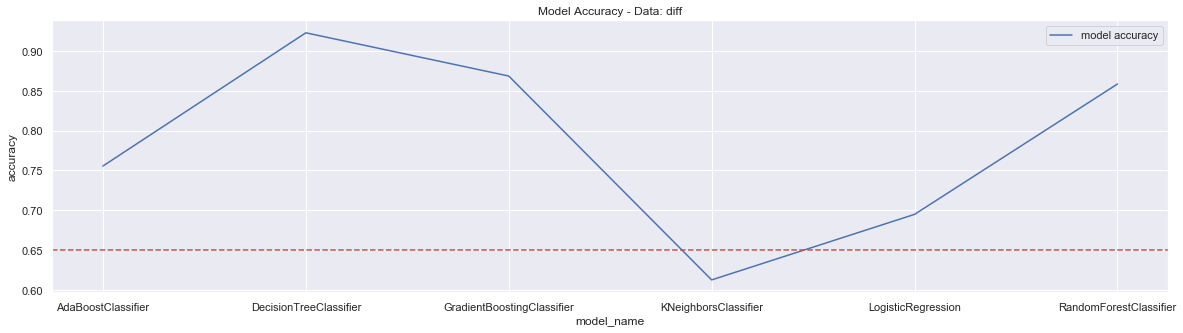

In [5]:
f, a = plt.subplots(1, 1, figsize=(20, 5))
sns.lineplot(x="model_name", y="accuracy", data=report, label="model accuracy")
a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy - Data: {DESCRIPTION}")